# SKI RESORT SNOWFALL CLUSTER ANALYSIS #

Both of us ski/snowboard frequently, naturally when we came across the Ski Resort dataset on Kaggle we were interested. This dataset was a little small but it had some interesting information in it. 

## Method 

In this analysis we will be cleaning our data and then running both KMeans and Mean shift clustering on Days open vs Average total snowfall for both Epic and Ikon resorts.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
resortSnowData = pd.read_csv('SkiPassProject.csv')
resortSnowData.head()

In [ ]:
epicResortData = resortSnowData.loc[resortSnowData['Ski Pass'] == 'Epic']
print(epicResortData)

ikonResortData = resortSnowData.loc[resortSnowData['Ski Pass'] == 'Ikon']
print(ikonResortData)

In [ ]:
epicDaysDF = epicResortData[['Days Open This Season', 'Avg Total Snowfall (inches)']]
epicDaysDF.dropna()

wcss = []
for i in range(1, 9):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    km.fit(epicDaysDF)
    wcss.append(km.inertia_)

In [ ]:
plt.plot(range(1,9), wcss, '-ro')
plt.title('Elbow')
plt.xlabel('Num Clsuters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k = 3
km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
y_km = km.fit_predict(epicDaysDF)

In [ ]:
epicDaysDF2 = epicDaysDF.rename(columns={'Days Open This Season': 'Days_Open', 'Avg Total Snowfall (inches)': 'Avg_Snowfall'})

print(epicDaysDF2.columns)

In [ ]:
minimum = 0
maximum = 300
step = 10

plt.figure(figsize=[16,8])
for i in range(0, k):
    plt.scatter(epicDaysDF2[y_km == i].Days_Open, epicDaysDF2[y_km == i].Avg_Snowfall)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker=',',s=50)

plt.xlabel('Days Open This Season')
plt.ylabel('Average Total Snowfall')
plt.title("Days Open in a Season vs Average Total Snowfall (Epic)")

plt.xlim(minimum, maximum)
plt.xticks(np.arange(minimum, maximum+1, step))

plt.show()

In [ ]:
ikonDaysDF = ikonResortData[['Days Open This Season', 'Avg Total Snowfall (inches)']]
ikonDaysDF.dropna()

wcss = []
for i in range(1, 9):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    km.fit(ikonDaysDF)
    wcss.append(km.inertia_)

In [ ]:
plt.plot(range(1,9), wcss, '-ro')
plt.title('Elbow')
plt.xlabel('Num Clsuters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k = 3
km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
y_km = km.fit_predict(ikonDaysDF)

In [ ]:
ikonDaysDF2 = ikonDaysDF.rename(columns={'Days Open This Season': 'Days_Open', 'Avg Total Snowfall (inches)': 'Avg_Snowfall'})

print(ikonDaysDF2.columns)

In [ ]:
plt.figure(figsize=[16,8])
for i in range(0, k):
    plt.scatter(ikonDaysDF2[y_km == i].Days_Open, ikonDaysDF2[y_km == i].Avg_Snowfall)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker=',',s=50)

plt.xlabel('Days Open This Season')
plt.ylabel('Average Total Snowfall')
plt.title("Days Open in a Season vs Average Total Snowfall (IKON)")

plt.xlim(minimum, maximum)
plt.xticks(np.arange(minimum, maximum+1, step))

plt.show()

In [ ]:
from sklearn.cluster import MeanShift as ms
from sklearn.cluster import estimate_bandwidth as estimate_bandwidth

In [ ]:
bw = estimate_bandwidth(epicDaysDF2, 0.4, n_samples=None, random_state=0)
print(bw)

In [ ]:
model = ms(bandwidth=bw)
y_meanShift = model.fit_predict(epicDaysDF2)

y_meanShift.shape

In [ ]:
epicDaysDF2 = epicDaysDF2.to_numpy()

In [ ]:
plt.figure(figsize=[16,8]) 

k = max(y_meanShift) + 1
for i in range(0, k):
    plt.scatter(epicDaysDF2[y_meanShift == i, 0], epicDaysDF2[y_meanShift == i, 1])

plt.xlabel('Days Open This Season')
plt.ylabel('Average Total Snowfall (inches)')
plt.title("Days Open in a Season vs Average Total Snowfall (Epic)")

plt.xlim(minimum, maximum)
plt.ylim(0, 600)
plt.xticks(np.arange(minimum, maximum+1, step))

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black', s=100)

In [ ]:
bw = estimate_bandwidth(ikonDaysDF2, 0.35, n_samples=None, random_state=0)
print(bw)

In [ ]:
model = ms(bandwidth=bw)
y_meanShift = model.fit_predict(ikonDaysDF2)

y_meanShift.shape

In [ ]:
ikonDaysDF2 = ikonDaysDF2.to_numpy()

In [ ]:
plt.figure(figsize=[16,8]) 

k = max(y_meanShift) + 1
for i in range(0, k):
    plt.scatter(ikonDaysDF2[y_meanShift == i, 0], ikonDaysDF2[y_meanShift == i, 1])

plt.xlabel('Days Open This Season')
plt.ylabel('Average Total Snowfall (inches)')
plt.title("Days Open in a Season vs Average Total Snowfall (Ikon)")

plt.xlim(minimum, maximum)
plt.ylim(0, 600)
plt.xticks(np.arange(minimum, maximum+1, step))

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black', s=100)

## Results ##

As we predicted, we saw that there definitely seems to be a coorelation between Average Total Snowfall and Days Open. Although there does seem to be some variability, this could be due to many factors including natural features making snow more resistant to melting, or resorts making their own snow to extend the length of the season.

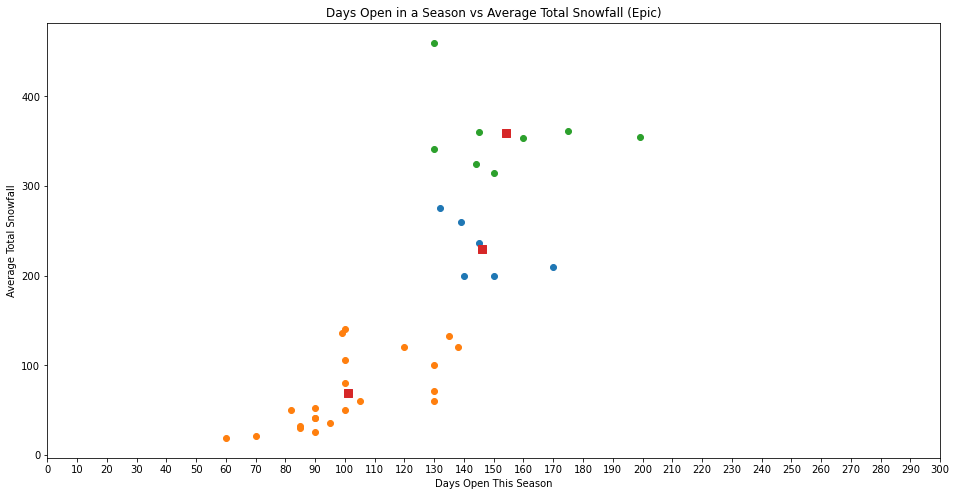

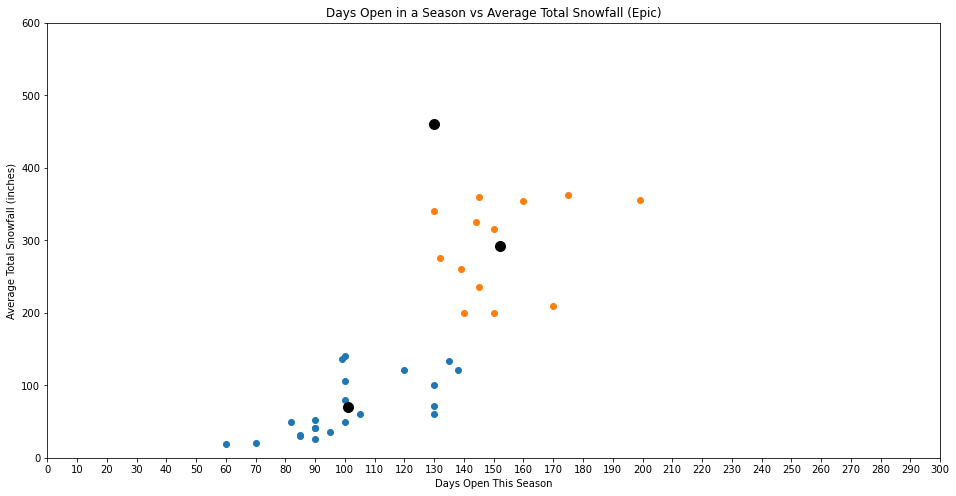

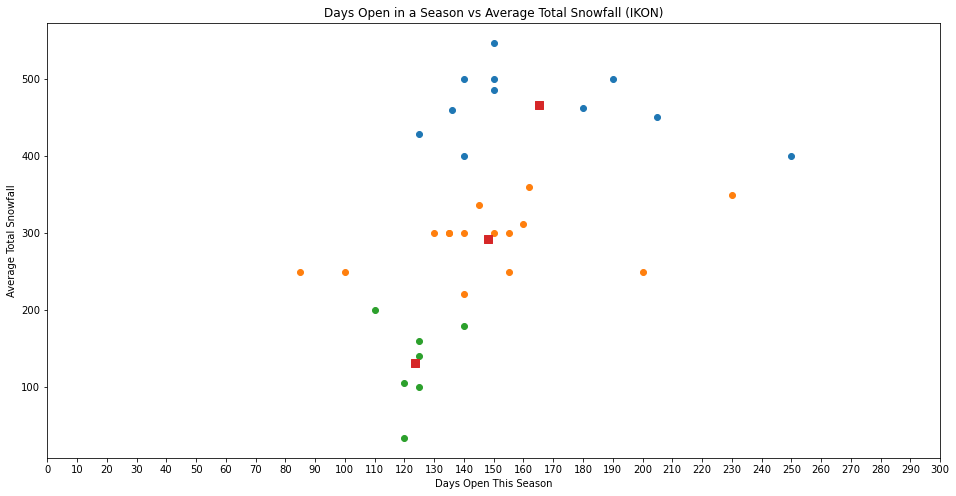

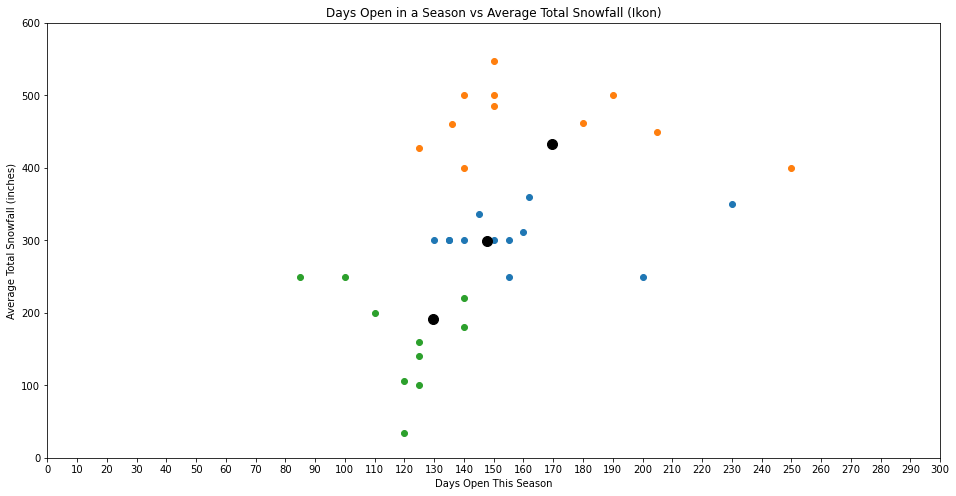

## Conclusion and Future Work 

Overall we really reinforced our understanding of KMeans, Mean shift, and data analysis. In the future we would like to potentially expand to more models between the other data in the dataset such as total run distance, total elevation, chairlift amount, and more.

## Division of Labor ##

-Jack: Writing Code, ideas

-Elliot: Error fixing, ideas, research/documentation